# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))


[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

## Read the merged object filtered for doublets and clusterized at high resolution

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [3]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered.rds")

## Check initial metadata

In [4]:
metadata<-adata[[]]

In [5]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	100689 obs. of  64 variables:
 $ orig.ident                       : chr  "MCO_01326" "MCO_01326" "MCO_01326" "MCO_01326" ...
 $ nCount_RNA                       : num  10351 9507 23590 16700 9684 ...
 $ nFeature_RNA                     : int  4753 4435 7082 5881 4688 4112 4336 5578 6960 7031 ...
 $ percent.mt                       : num  0.473 0.337 0.165 1.485 0.434 ...
 $ nCount_RNA_raw                   : num  11643 10909 24492 17664 11274 ...
 $ nFeature_RNA_raw                 : int  4772 4612 7084 5921 4715 4434 4383 5582 6963 7032 ...
 $ nCount_ATAC                      : num  29946 90488 71936 50024 54272 ...
 $ nFeature_ATAC                    : int  7431 20806 16684 12087 12915 5012 15158 18007 9850 31543 ...
 $ gex_raw_reads                    : int  23298 21771 47400 31849 21620 20973 19452 29421 48530 46234 ...
 $ gex_mapped_reads                 : int  22654 21165 46078 31152 20952 20394 18917 28598 47182 44973 ...
 $ gex_conf_intergenic_reads    

# Graphs of clusterization

In [7]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/",'graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

## Graph WNN by SampleID

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

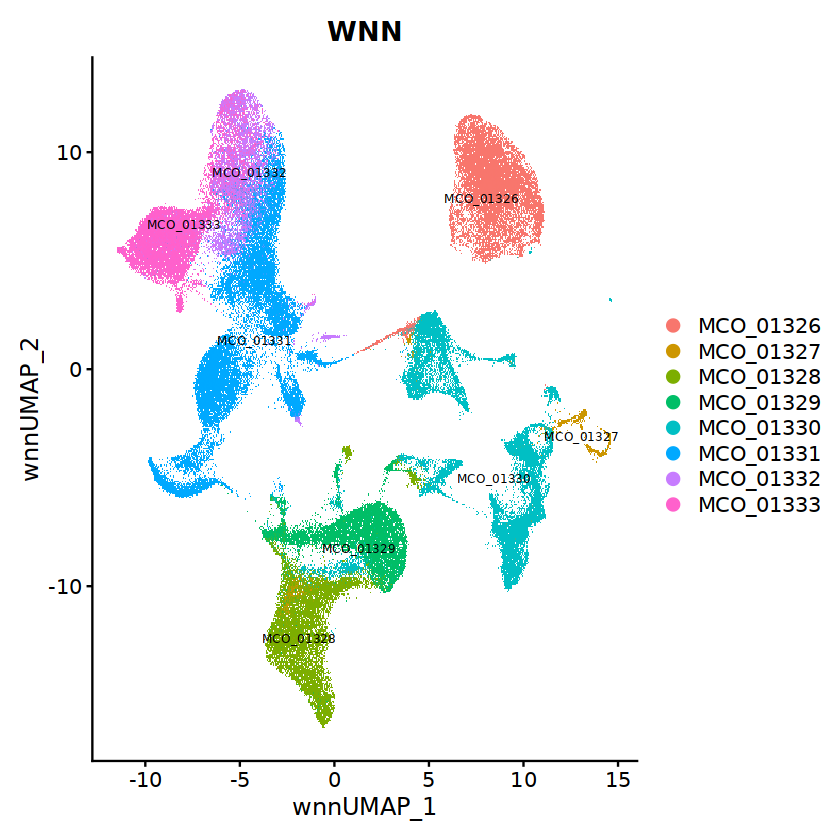

In [8]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

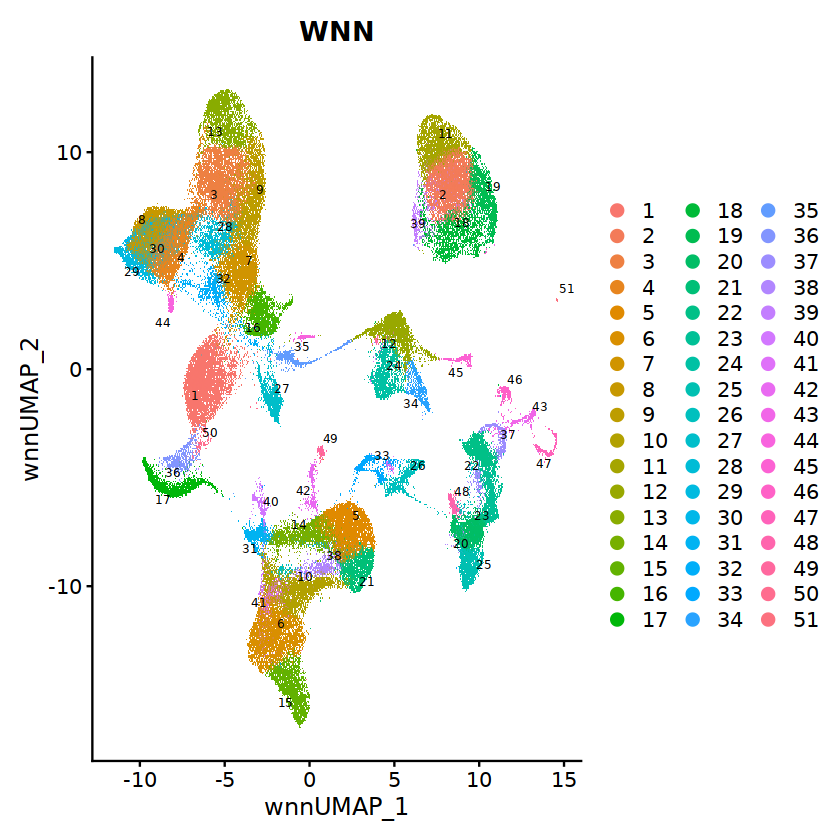

In [10]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN_Intermediate_QC_metrics

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

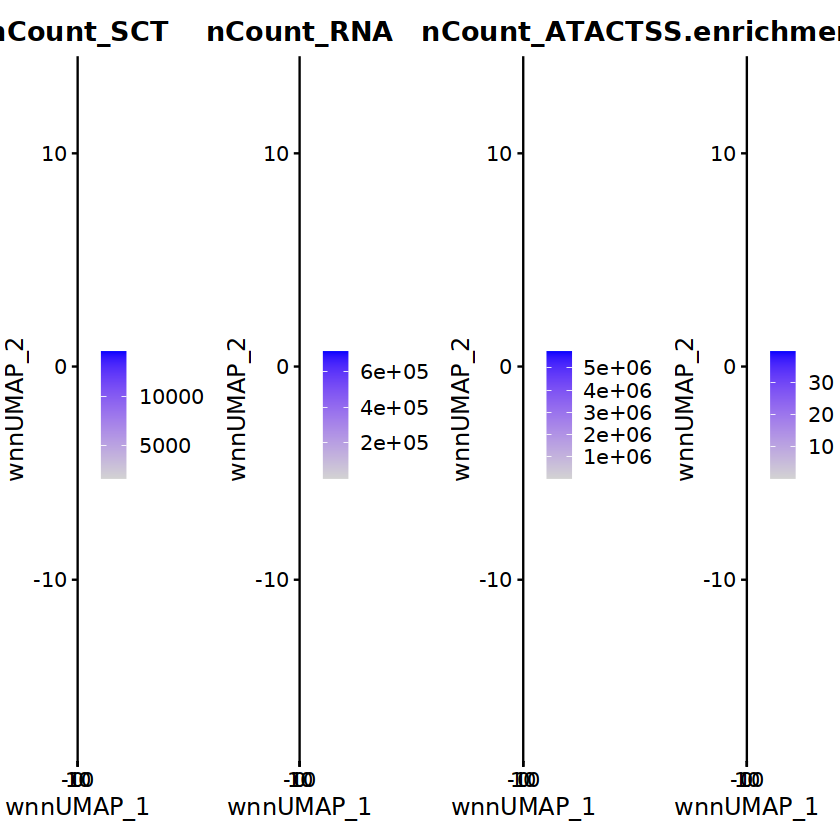

In [11]:
p6 <- FeaturePlot(adata, features = c("nCount_SCT", "nCount_RNA", "nCount_ATAC",'TSS.enrichment'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics.png', width =1000, height = 500)
p6
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

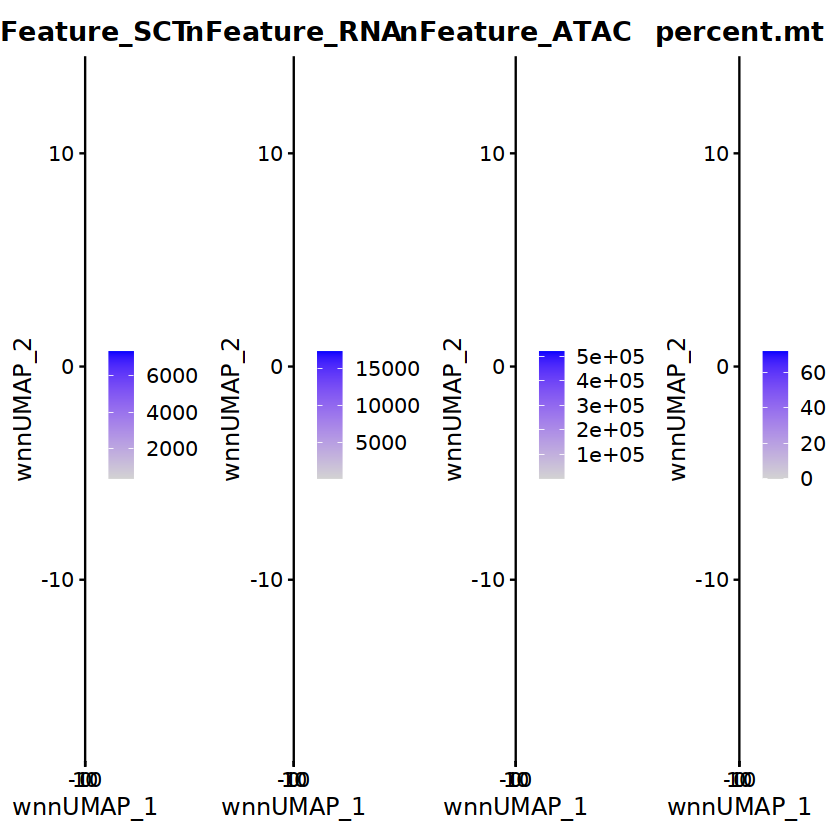

In [12]:
p6 <- FeaturePlot(adata, features = c("nFeature_SCT", "nFeature_RNA", "nFeature_ATAC",'percent.mt'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics_2.png', width =1000, height = 500)
p6
dev.off()

## Graph WNN by marker genes

In [15]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:33160] "MIR1302-2HG" "AL627309.1" "AL627309.3" "AL627309.5" ...


In [19]:
genes[grep("GZM", genes)]

[1] "GZMK" "GZMA" "GZMH" "GZMB" "GZMM"

In [24]:
genes[grep("IFNG", genes)]

[1] "IFNGR1"   "IFNG-AS1" "IFNG"     "IFNGR2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

png 
  2

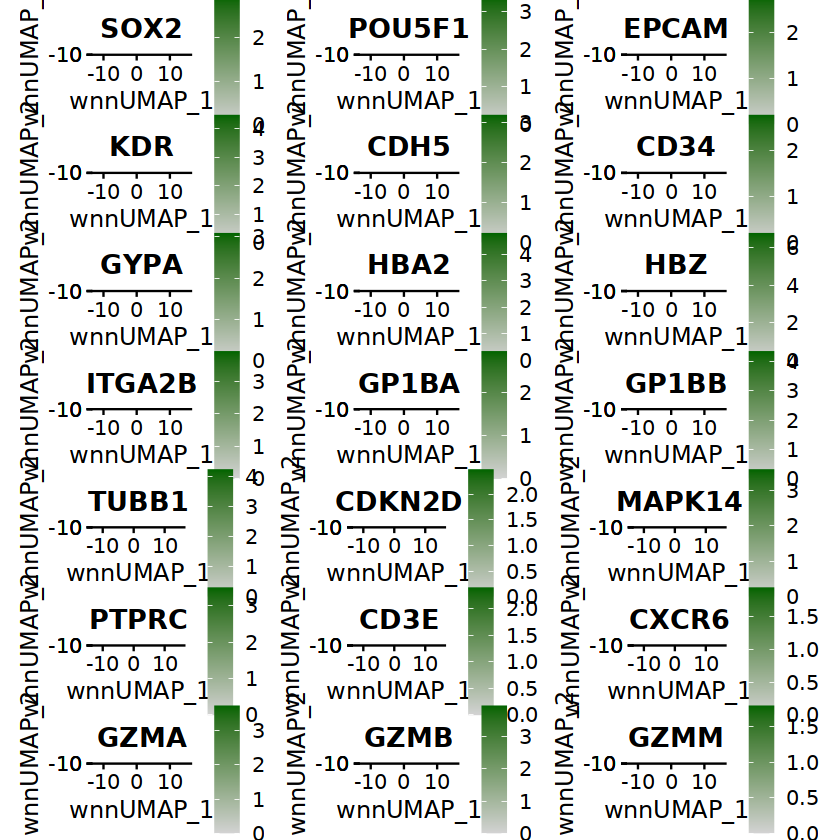

In [26]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('SOX2','POU5F1','EPCAM'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)

p5_B <- FeaturePlot(adata, features = c("KDR",'CDH5','CD34'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)
p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('PTPRC','CD3E','CXCR6'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_8 <- FeaturePlot(adata, features = c('GZMA','GZMB','GZMM'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5 / p5_B / p5_1 / p5_3 / p_6 / p_7 / p_8

setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 1750)
p5 / p5_B / p5_1 / p5_3 / p_6 / p_7 / p_8
dev.off()

# Violin graphs to decide if a cluster is lowQuality

## Percent.mt

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

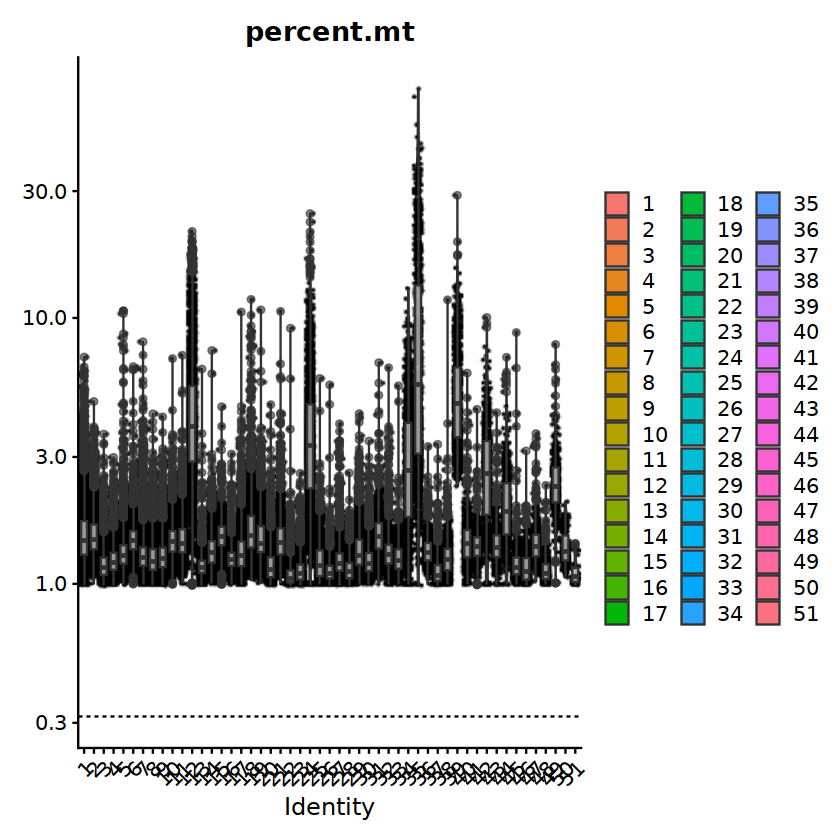

In [27]:
p10 <- VlnPlot(adata, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

In [28]:
p10 <- VlnPlot(adata, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## nFeature_SCT

In [29]:
p10 <- VlnPlot(adata, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## nCount_ATAC

In [30]:
p10 <- VlnPlot(adata, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC.png', width =2000, height = 500)
p10
dev.off()



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## nFeature_ATAC

In [31]:
####

p10 <- VlnPlot(adata, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## nCount_RNA

In [32]:
####

p10 <- VlnPlot(adata, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## nFeature_RNA

In [33]:
####

p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA.png', width =2000, height = 500)
p10
dev.off()


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## TSS.enrichment

In [34]:
####

p10 <- VlnPlot(adata, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## amulet_nFrags

In [35]:
####

p10 <- VlnPlot(adata, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags.png', width =2000, height = 500)
p10
dev.off()


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## scDblFinder.score

In [36]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

## scDblFinder.score_atac

In [37]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac.png', width =2000, height = 500)
p10
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

# QC decisions

In [6]:
adata

An object of class Seurat 
670088 features across 100689 samples within 4 assays 
Active assay: ATAC (563726 features, 563726 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [7]:
###### Remove high mito content cells (more or equal to 10% mt genes ------------------
  
adata = subset(adata, subset = percent.mt < 10)

In [8]:
adata

An object of class Seurat 
670088 features across 100265 samples within 4 assays 
Active assay: ATAC (563726 features, 563726 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

# DECISION TO FILTER OUT CLUSTERS 35 and 44 based pc.mt and nFeatures SCT

In [9]:
adata3 = subset(adata, seurat_clusters!= 35)


adata3

An object of class Seurat 
670088 features across 99716 samples within 4 assays 
Active assay: ATAC (563726 features, 563726 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [10]:
rm(adata)

In [11]:
adata3 = subset(adata3, seurat_clusters!= 44)

In [12]:
adata3

An object of class Seurat 
670088 features across 99255 samples within 4 assays 
Active assay: ATAC (563726 features, 563726 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

# Save QC'ed object 

In [13]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [14]:
saveRDS(adata3, file="merged_unprocessed_db_filt_clustered_QCed.rds")

# Post QC Violin graphs to decide if a cluster is lowQuality

In [16]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/",'graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

## Percent.mt

png 
  2

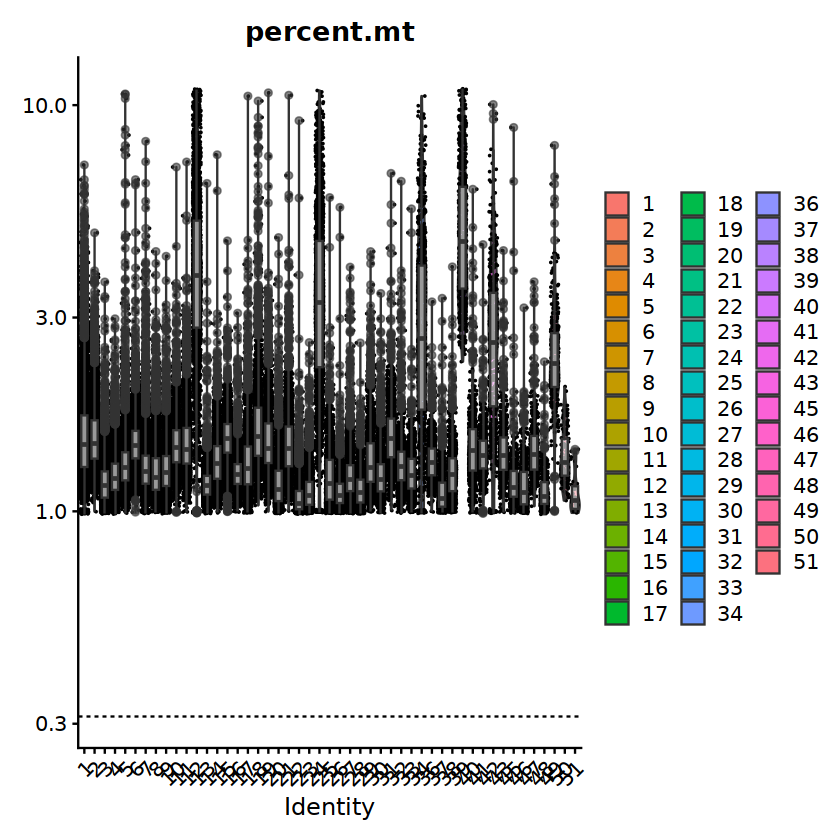

In [17]:
p10 <- VlnPlot(adata3, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent_POST.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

In [18]:
p10 <- VlnPlot(adata3, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_SCT

In [19]:
p10 <- VlnPlot(adata3, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_ATAC

In [20]:
p10 <- VlnPlot(adata3, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC_POST.png', width =2000, height = 500)
p10
dev.off()



png 
  2

## nFeature_ATAC

In [21]:
####

p10 <- VlnPlot(adata3, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_RNA

In [22]:
####

p10 <- VlnPlot(adata3, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_RNA

In [23]:
####

p10 <- VlnPlot(adata3, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA_POST.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## TSS.enrichment

In [24]:
####

p10 <- VlnPlot(adata3, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## amulet_nFrags

In [25]:
####

p10 <- VlnPlot(adata3, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags_POST.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## scDblFinder.score

In [26]:
####

p10 <- VlnPlot(adata3, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## scDblFinder.score_atac

In [27]:
####

p10 <- VlnPlot(adata3, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

# Load SeuratData and SeuratDisk

In [4]:
suppressMessages(library(SeuratData))
suppressMessages(library(SeuratDisk))

Warning message:
"package 'SeuratData' was built under R version 4.3.3"
Warning message:
"package 'SeuratDisk' was built under R version 4.3.3"


# Pickup from the QCed

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

In [3]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed.rds")

In [5]:
adata

An object of class Seurat 
670088 features across 99255 samples within 4 assays 
Active assay: ATAC (563726 features, 563726 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [8]:
DefaultAssay(adata)<-'RNA_raw'
RNA_only<-DietSeurat(adata, assays = "RNA_raw")

In [9]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/Multiome/processing_outputs/")

SaveH5Seurat(RNA_only, filename = "merged_unprocessed_db_filt_clustered_QCed_reclustered.h5Seurat")
  Convert("merged_unprocessed_db_filt_clustered_QCed_reclustered.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA_raw

Adding data for RNA_raw

No variable features found for RNA_raw

No feature-level metadata found for RNA_raw

Validating h5Seurat file

Warning message:
"Cannot find assaySCT in the h5Seurat file"
Warning message:
"Cannot find assaySCT in the h5Seurat file"
Warning message:
"Cannot find assaySCT in the h5Seurat file"
Warning message:
"Cannot find assaySCT in the h5Seurat file"
Warning message:
"Cannot find assayATAC in the h5Seurat file"
Warning message:
"Cannot find assayATAC in the h5Seurat file"
Warning message:
"Cannot find assaySCT in the h5Seurat file"
Warning message:
"Cannot find assayRNA in the h5Seurat file"
Adding data from RNA_raw as X

Adding counts from RNA_raw as raw

Transfering meta.data to obs

